In [21]:
#Jul 17, 2025
#Author : Diksha Aswal

##### In Experiment 6, we introduced a more adaptive and statistically grounded stopping condition for the simulation: rather than terminating after a fixed number of failed attempts (total_skips), we dynamically stopped the simulation once the failure rate exceeded 1%, using the ratio (total_tries * 100) / len(allocated_circles) > 1. This approach aims to balance efficiency with fairness, allowing the simulation to continue until it becomes increasingly unlikely that a new circle can be placed.

In [24]:
from utility_functions import generate_diameters, place_circles_2, save_circles, save_attempts, calculate_packing_efficiency, place_circles_1, is_overlapping
from graphing_tools import plot_circles, plot_distribution
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm
from collections import defaultdict
import time

In [26]:
# Sheet dimensions
sheet_width = 1000
sheet_height = 1000

# Circle Distribution parameters
mean_diameter = 20
std_diameter = 5
min_diameter = 10
max_diameter = 30


population_size = 1000000

allocated_circles = []
attempts_dict = defaultdict(int)
max_attempts=1000000

In [5]:
raw_diameters = generate_diameters(population_size, mean_diameter, std_diameter)

truncated_diameters = raw_diameters[(raw_diameters >= min_diameter) & (raw_diameters <= max_diameter)]
allocated_circles, attempts_dict, total_tries = place_circles_1(truncated_diameters, max_attempts, sheet_width, sheet_height)

❌ Skipped a circle after 1000000 attempts. Skip count: 1
❌ Skipped a circle after 1000000 attempts. Skip count: 2
❌ Skipped a circle after 1000000 attempts. Skip count: 3
❌ Skipped a circle after 1000000 attempts. Skip count: 4
❌ Skipped a circle after 1000000 attempts. Skip count: 5
❌ Skipped a circle after 1000000 attempts. Skip count: 6
❌ Skipped a circle after 1000000 attempts. Skip count: 7
❌ Skipped a circle after 1000000 attempts. Skip count: 8
❌ Skipped a circle after 1000000 attempts. Skip count: 9
❌ Skipped a circle after 1000000 attempts. Skip count: 10
❌ Skipped a circle after 1000000 attempts. Skip count: 11
❌ Skipped a circle after 1000000 attempts. Skip count: 12
❌ Skipped a circle after 1000000 attempts. Skip count: 13
❌ Skipped a circle after 1000000 attempts. Skip count: 14
❌ Skipped a circle after 1000000 attempts. Skip count: 15
❌ Skipped a circle after 1000000 attempts. Skip count: 16
❌ Skipped a circle after 1000000 attempts. Skip count: 17


In [6]:
save_circles(allocated_circles, 'allocated_circles_Experiment6a.csv')
save_attempts(attempts_dict, 'attempts_distribution_Experiment6a.csv')

##### We next Experimented with bin size = 0.1 for the grid (function place_circles_2), which allows for finer spatial allocation.

In [9]:
raw_diameters = generate_diameters(population_size, mean_diameter, std_diameter)

truncated_diameters = raw_diameters[(raw_diameters >= min_diameter) & (raw_diameters <= max_diameter)]
allocated_circles, attempts_dict, total_tries = place_circles_2(truncated_diameters, max_attempts, sheet_width, sheet_height)

new condition for stopping criteria  and grid bin size = 0.1
❌ Skipped a circle after 1000000 attempts. Skip count: 1
❌ Skipped a circle after 1000000 attempts. Skip count: 2
❌ Skipped a circle after 1000000 attempts. Skip count: 3
❌ Skipped a circle after 1000000 attempts. Skip count: 4
❌ Skipped a circle after 1000000 attempts. Skip count: 5
❌ Skipped a circle after 1000000 attempts. Skip count: 6
❌ Skipped a circle after 1000000 attempts. Skip count: 7
❌ Skipped a circle after 1000000 attempts. Skip count: 8
❌ Skipped a circle after 1000000 attempts. Skip count: 9
❌ Skipped a circle after 1000000 attempts. Skip count: 10
❌ Skipped a circle after 1000000 attempts. Skip count: 11
❌ Skipped a circle after 1000000 attempts. Skip count: 12
❌ Skipped a circle after 1000000 attempts. Skip count: 13
❌ Skipped a circle after 1000000 attempts. Skip count: 14
❌ Skipped a circle after 1000000 attempts. Skip count: 15
❌ Skipped a circle after 1000000 attempts. Skip count: 16


In [11]:
save_circles(allocated_circles, 'allocated_circles_Experiment6b.csv')
save_attempts(attempts_dict, 'attempts_distribution_Experiment6b.csv')

Packing Efficiency: 0.5027 (50.27%)


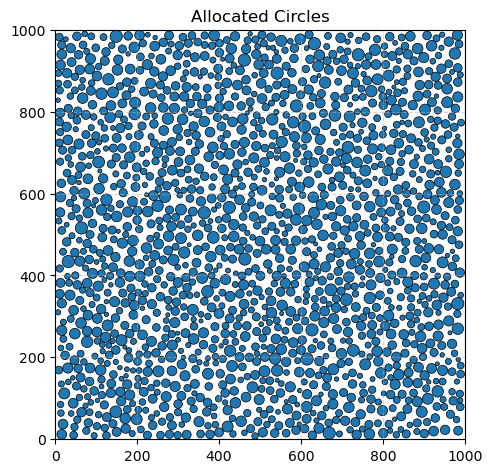

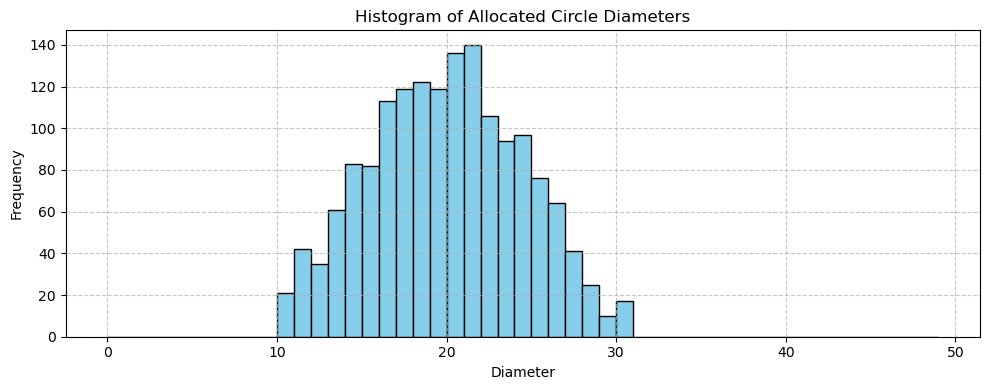

In [17]:
allocated_circles = pd.read_csv('allocated_circles_Experiment6a.csv')
allocated_circles = pd.read_csv('allocated_circles_Experiment6a.csv')
packing_efficiency = calculate_packing_efficiency(sheet_width, sheet_height, allocated_circles)
print(f"Packing Efficiency: {packing_efficiency:.4f} ({packing_efficiency*100:.2f}%)")
plot_circles(sheet_width, sheet_height, allocated_circles)
plot_distribution(0, 50, allocated_circles)

Packing Efficiency: 0.5030 (50.30%)


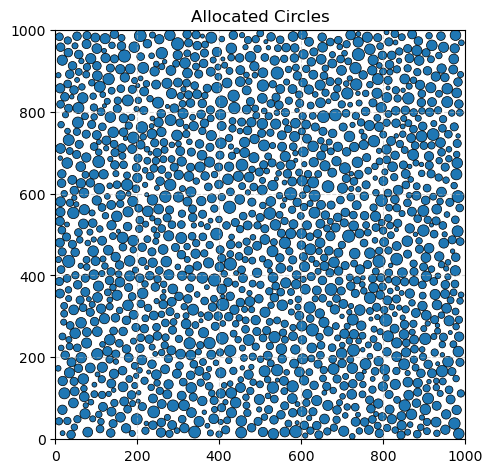

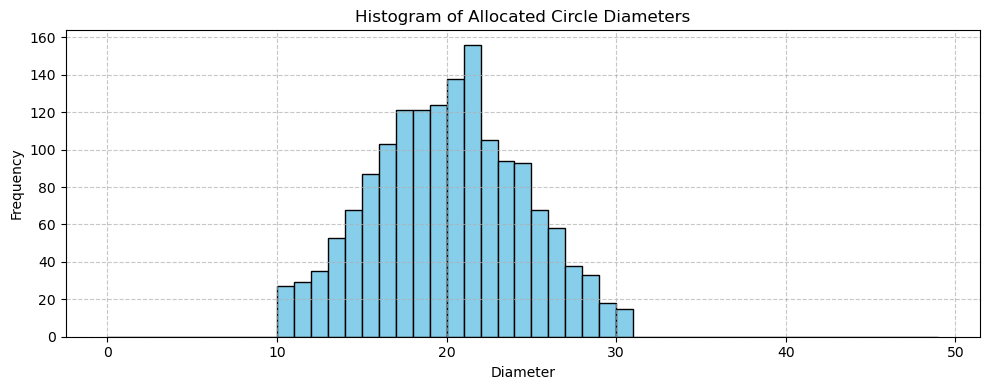

In [19]:
allocated_circles = pd.read_csv('allocated_circles_Experiment6b.csv')
allocated_circles = pd.read_csv('allocated_circles_Experiment6b.csv')
packing_efficiency = calculate_packing_efficiency(sheet_width, sheet_height, allocated_circles)
print(f"Packing Efficiency: {packing_efficiency:.4f} ({packing_efficiency*100:.2f}%)")
plot_circles(sheet_width, sheet_height, allocated_circles)
plot_distribution(0, 50, allocated_circles)

##### Both methods in Experiment 6 gave similar packing efficiencies (around 50.27% and 50.30%), showing that using finer placement (with 0.1 resolution) doesn’t make much difference in a random placement strategy. However, the new dynamic stopping condition helped keep the diameter distribution more balanced and centered around the original mean, unlike fixed stopping rules which often favor smaller circles. This suggests that adaptive termination is useful, but to get better packing without changing the size distribution, we’ll need smarter ways of choosing where and how to place the circles, not just when to stop.